# Filterkennlinie Simulation

Dieses Jupyter Notebook simuliert die Frequenzantwort eines Filters (Tiefpass, Hochpass oder Bandpass). Die Kurve wird schrittweise gezeichnet, damit du den Verlauf verfolgen kannst. Du kannst die Anzahl der Messpunkte, die Grenzfrequenz und andere Parameter anpassen. Experimentiere mit dem Code und ändere die Werte!

---

## 1. Einrichtung und Parameter

Importiere die notwendigen Bibliotheken und definiere die Parameter. Du kannst diese Werte nach Belieben ändern:

- `num_points`: Anzahl der Messpunkte (z. B. 50, 100, 200).
- `cutoff_freq`: Grenzfrequenz in Hz (z. B. 1000 Hz).
- `filter_type`: Filtertyp ("Tiefpass", "Hochpass", "Bandpass").
- `Vin`: Eingangsspannung (Amplitude in Volt, z. B. 1.0 V).
- `delay`: Verzögerung zwischen den Schritten in Sekunden (z. B. 0.1).

Führe die folgende Zelle aus, um die Parameter zu setzen.

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Anpassbare Parameter
num_points = 100  # Anzahl der Messpunkte
cutoff_freq = 1000.0  # Grenzfrequenz in Hz
filter_type = "Tiefpass"  # Filtertyp ("Tiefpass", "Hochpass", "Bandpass")
Vin = 1.0  # Eingangsspannung (V)

# Frequenzbereich erstellen (logarithmische Skala von 10 Hz bis 100 kHz)
frequencies = np.logspace(np.log10(10), np.log10(100000), num_points)
amplitudes = []  # Liste initialisieren

## 2. Simulation der Filterkennlinie

Hier simulieren wir die Frequenzantwort des Filters schrittweise. Die Ausgangsamplitude wird basierend auf einem einfachen Modell berechnet. Du kannst die Formeln ändern, um komplexere Filter zu simulieren.

Führe die folgende Zelle aus, um die Simulation durchzuführen.

In [24]:
# Simulation
amplitudes = []  # Zurücksetzen der amplitudes-Liste vor der Simulation
if filter_type == "Tiefpass":
    for f in frequencies:
        gain = 1 / np.sqrt(1 + (f / cutoff_freq)**2)
        Vout = Vin * gain
        amplitudes.append(Vout)
elif filter_type == "Hochpass":
    for f in frequencies:
        gain = (f / cutoff_freq) / np.sqrt(1 + (f / cutoff_freq)**2)
        Vout = Vin * gain
        amplitudes.append(Vout)
else:  # Bandpass
    fc1 = cutoff_freq / 2  # Untere Grenzfrequenz
    fc2 = cutoff_freq * 2  # Obere Grenzfrequenz
    for f in frequencies:
        gain_hp = (f / fc1) / np.sqrt(1 + (f / fc1)**2)
        gain_lp = 1 / np.sqrt(1 + (f / fc2)**2)
        gain = gain_hp * gain_lp
        Vout = Vin * gain
        amplitudes.append(Vout)

# Überprüfe die Längen
if len(frequencies) != len(amplitudes):
    raise ValueError(f"Längen stimmen nicht überein: frequencies={len(frequencies)}, amplitudes={len(amplitudes)}")

# Erstelle eine Tabelle mit den simulierten Werten
data = {
    "Frequenz (Hz)": [f"{f:.2f}" for f in frequencies[:10]],  # Erste 10 Werte
    "Amplitude (V)": [f"{a:.4f}" for a in amplitudes[:10]]
}
df = pd.DataFrame(data)
display(df)

print("Simulation abgeschlossen.")

,Frequenz (Hz),Amplitude (V)
0,10.00,1.0000
1,10.97,0.9999
2,12.05,0.9999
3,13.22,0.9999
4,14.51,0.9999
5,15.92,0.9999
6,17.48,0.9998
7,19.18,0.9998
8,21.05,0.9998
9,23.10,0.9997


Simulation abgeschlossen.


## 3. Visualisierung der Filterkennlinie

Jetzt zeichnen wir die vollständige Filterkennlinie. Die Kurve wird am Ende der Simulation angezeigt. Du kannst das Diagrammformat ändern (z. B. Achsenbeschriftungen oder Farben).

Führe die folgende Zelle aus, um die Darstellung zu sehen.

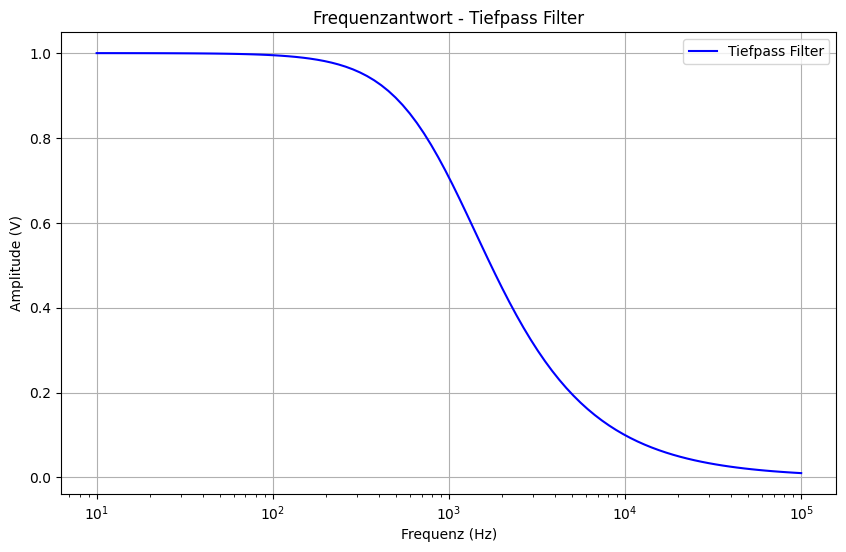

In [25]:
# Visualisierung
fig, ax = plt.subplots(figsize=(10, 6))
ax.semilogx(frequencies, amplitudes, 'b-', label=f'{filter_type} Filter')
ax.set_xlabel('Frequenz (Hz)')
ax.set_ylabel('Amplitude (V)')
ax.set_title(f'Frequenzantwort - {filter_type} Filter')
ax.grid(True)
ax.legend()
plt.show()

## 4. Daten speichern (optional)

Speichere die simulierten Daten in eine CSV-Datei. Du kannst den Dateipfad oder das Format ändern.

Führe die folgende Zelle aus, um die Daten zu speichern.

In [6]:
import csv

with open('filterkennlinie.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Frequenz (Hz)', 'Amplitude (V)'])
    for f, a in zip(frequencies, amplitudes):
        writer.writerow([f, a])

print("Daten wurden in 'filterkennlinie.csv' gespeichert.")

Daten wurden in 'filterkennlinie.csv' gespeichert.


## 5. Experimentiere!

- Ändere `num_points` oder `cutoff_freq`, um die Auflösung oder den Frequenzbereich zu ändern.
- Wähle einen anderen `filter_type` (\"Tiefpass\", \"Hochpass\", \"Bandpass\") und beobachte die Veränderung.
- Passe `Vin` an, um die Eingangsspannung zu variieren.
- Ändere das Diagrammformat (z. B. Farbe mit `color='r'` oder Linienstil mit `linestyle='--'`).
- Erweitere die Simulation, um Filter höherer Ordnung (z. B. mit \\( (f / fc)^{2n} \\)) zu modellieren.

Versuche es aus und analysiere die Veränderungen!